# I. Import modules, configs

## I.1 Configs

In [45]:
#Import libraries
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

#We can now use this folder and import our modules
sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/zillow_price")

from src.utils.functions import *

# Pandas configurations 
sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## I.2 Dataset import

In [46]:
#Import data
print('Loading data...')

df = pd.read_csv('../Data/intermediate_data/train_set.csv', low_memory=False)

print('Data has been loaded ...')

Loading data...
Data has been loaded ...


# II. Columns Selection

## II.1 Drop all columns with more than 90% missing values

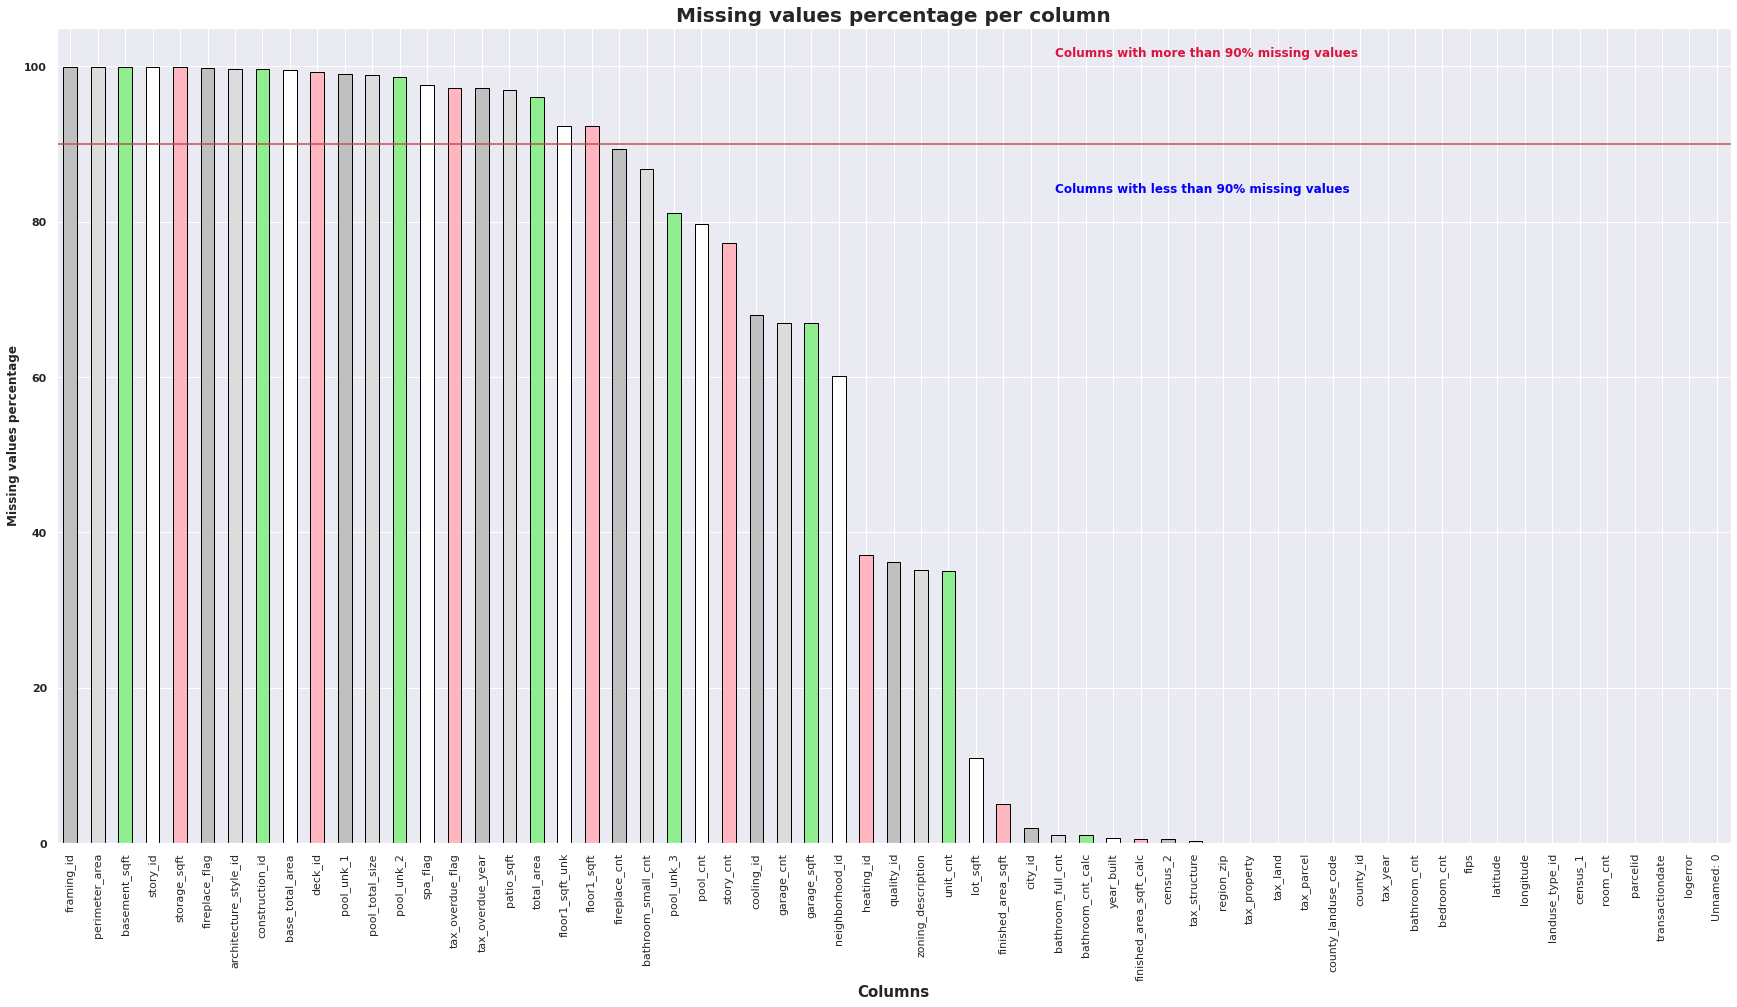

In [47]:
# Histogram of our columns showing the percentage of missing values
msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

We can see that we have a lot of columns that have more than 90% values missing. Let's drop them there's really nothing we can do with that much missing values.

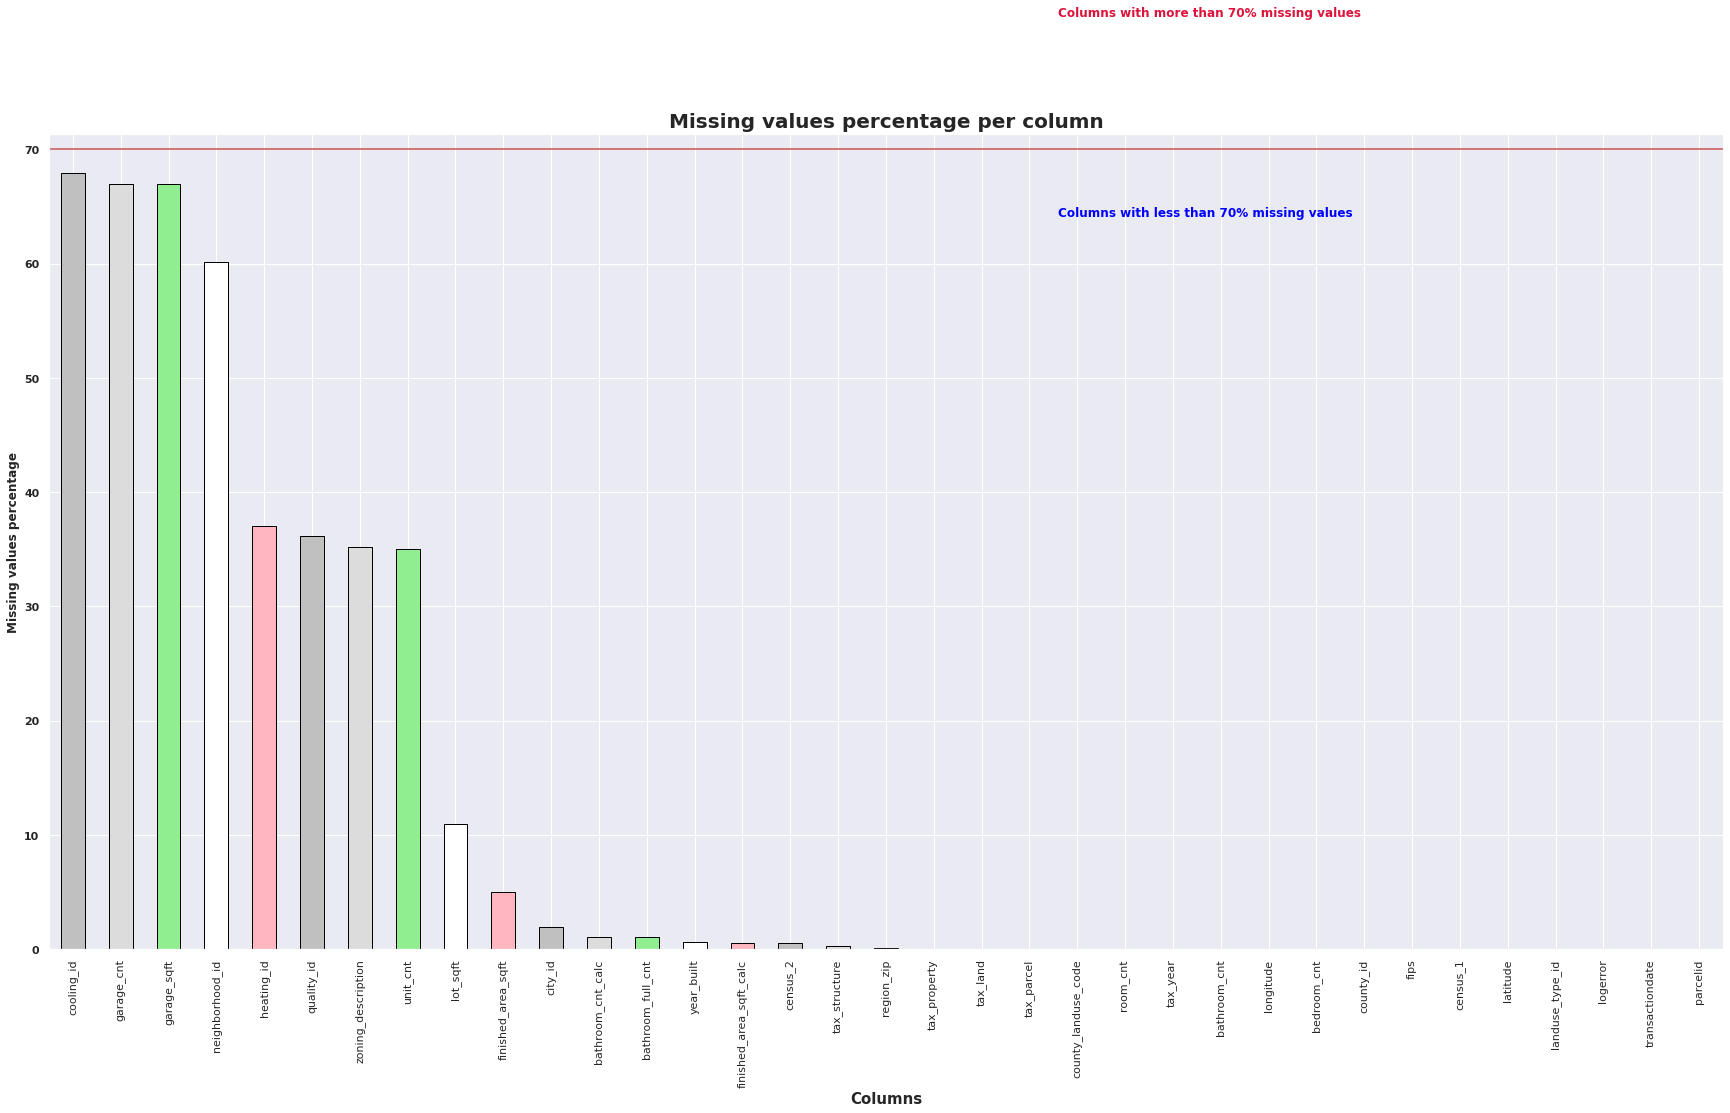

There are 167,888 rows and 35 columns in our dataset


In [48]:
df = df.drop('Unnamed: 0', axis=1)
# We drop all values that have less than 10% usable data 
df = df.dropna(thresh=(df.shape[0] * 30 / 100), axis=1)
msv1(df,70, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))
print('There are {:,} rows and {} columns in our dataset'.format(df.shape[0], df.shape[1]))


## III.2 Checking correlation between variables with missing values

# III. Taking care of the missing values

## III.1 Some variables can be filled with 0 value

In [49]:
numeric_df = df.select_dtypes(include="float64").columns
for col in numeric_df:
    df[col] = df[col].fillna(0.0)

In [50]:
df.isnull().sum()

parcelid                       0
logerror                       0
transactiondate                0
cooling_id                     0
bathroom_cnt                   0
bedroom_cnt                    0
quality_id                     0
bathroom_cnt_calc              0
finished_area_sqft_calc        0
finished_area_sqft             0
fips                           0
bathroom_full_cnt              0
garage_cnt                     0
garage_sqft                    0
heating_id                     0
latitude                       0
longitude                      0
lot_sqft                       0
county_landuse_code           35
landuse_type_id                0
zoning_description         59099
census_1                       0
city_id                        0
county_id                      0
neighborhood_id                0
region_zip                     0
room_cnt                       0
unit_cnt                       0
year_built                     0
tax_structure                  0
tax_parcel

We assume that if that features have missing values, it's because that haven't been filled. Therefore, we could assume that if they haven't been filled it's because they aren't any fireplace, pool, garage, ect... Let's fill the missing values with 0. 

In [51]:
missing_values_columns = df.columns[df.isnull().any()]
missing_values_columns

Index(['county_landuse_code', 'zoning_description'], dtype='object')

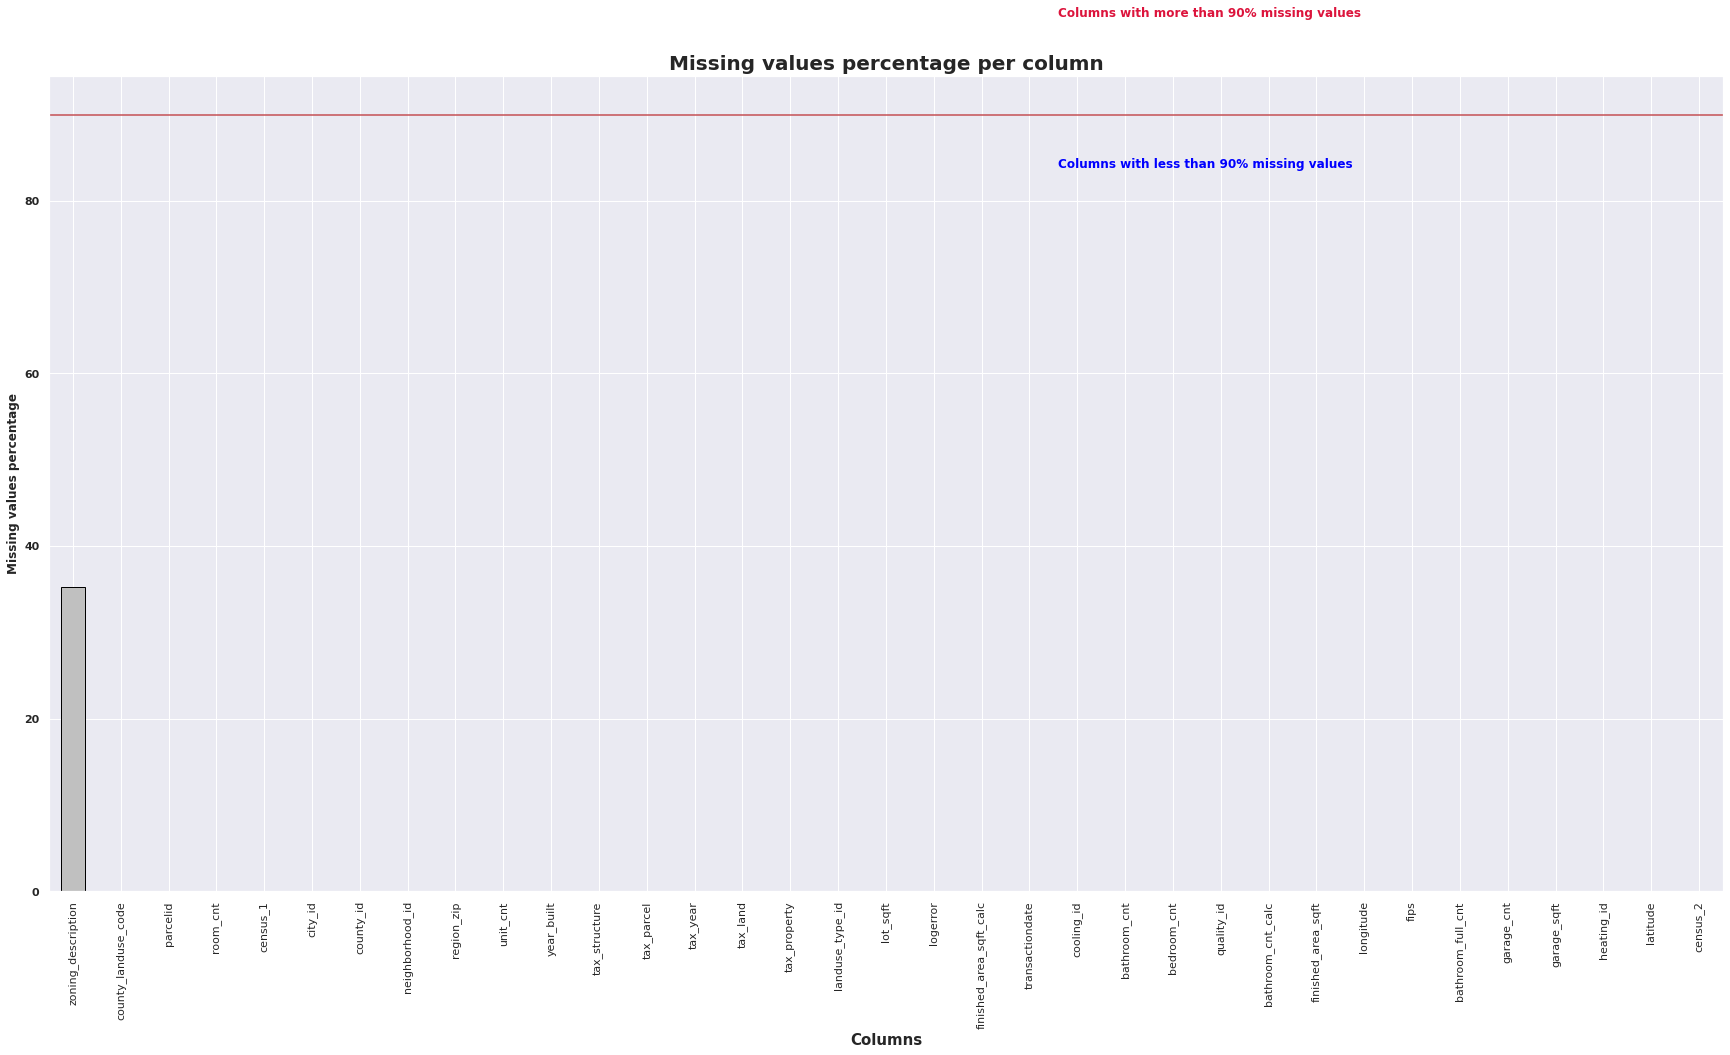

In [52]:
msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

In [53]:
objects_df = df.select_dtypes(include="object")
print(list(objects_df))

['transactiondate', 'county_landuse_code', 'zoning_description']


In [54]:
df["zoning_description"].value_counts()

LAR1          14444
LAR3           5251
LARS           2897
LBR1N          2684
LARD1.5        2437
              ...  
TOA1              1
LCA1 20000        1
RMPYYY            1
PDRI-7000         1
LBRI              1
Name: zoning_description, Length: 2346, dtype: int64

Let's fill the zoning description column with the most frequent value 'LAR1'

In [55]:
df["zoning_description"] = df["zoning_description"].fillna('LAR1')

In [58]:
df['county_landuse_code'].value_counts()

0100    57628
122     28450
010C    19102
0101    13848
34      10878
1111     7245
1        5314
010E     4339
010D     4155
0200     4000
1129     3023
1110     2142
0400     1369
0300     1063
012C      908
0104      717
1128      691
01DC      463
01HC      285
010V      245
38        200
96        195
0103      191
010G      174
010H      136
010M      112
0700      104
0108      103
1117      102
1210       89
135        73
0201       66
010F       57
0109       45
1222       44
1014       32
1116       21
73         20
1410       18
1720       14
1112       13
012E       12
070D       12
1310       12
01HE       11
0110       10
1321        9
0401        8
040V        8
0113        6
0102        6
105         5
020G        5
100V        5
012D        5
1421        4
0141        4
1333        4
1432        3
0301        3
0111        3
1722        3
0105        3
030G        3
0130        3
1120        3
0114        2
020M        2
0131        2
1012        2
1011        2
1420  

In [59]:
df['county_landuse_code'] = df['county_landuse_code'].fillna('0100')

In [60]:
df.head()

,parcelid,logerror,transactiondate,cooling_id,bathroom_cnt,bedroom_cnt,quality_id,bathroom_cnt_calc,finished_area_sqft_calc,finished_area_sqft,fips,bathroom_full_cnt,garage_cnt,garage_sqft,heating_id,latitude,longitude,lot_sqft,county_landuse_code,landuse_type_id,zoning_description,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,unit_cnt,year_built,tax_structure,tax_parcel,tax_year,tax_land,tax_property,census_2
0,14297519,0.03,2017-01-01,0.00,3.50,4.00,0.00,3.50,3100.00,3100.00,6059.00,3.00,2.00,633.00,0.00,33634931.00,-117869207.00,4506.00,122,261.00,LAR1,60590630.07,53571.00,1286.00,0.00,96978.00,0.00,0.00,1998.00,485713.00,1023282.00,2016.00,537569.00,11013.72,60590630072012.00
1,17052889,0.06,2017-01-01,0.00,1.00,2.00,0.00,1.00,1465.00,1465.00,6111.00,1.00,1.00,0.00,0.00,34449266.00,-119281531.00,12647.00,1110,261.00,LAR1,61110010.02,13091.00,2061.00,0.00,97099.00,5.00,0.00,1967.00,88000.00,464000.00,2016.00,376000.00,5672.48,61110010023006.00
2,14186244,0.01,2017-01-01,0.00,2.00,3.00,0.00,2.00,1243.00,1243.00,6059.00,2.00,2.00,440.00,0.00,33886168.00,-117823170.00,8432.00,122,261.00,LAR1,60590218.02,21412.00,1286.00,0.00,97078.00,6.00,0.00,1962.00,85289.00,564778.00,2016.00,479489.00,6488.30,60590218022012.00
3,12177905,-0.10,2017-01-01,0.00,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,0.00,0.00,2.00,34245180.00,-118240722.00,13038.00,0101,261.00,LCR110000*,60373001.00,396551.00,3101.00,0.00,96330.00,0.00,1.00,1970.00,108918.00,145143.00,2016.00,36225.00,1777.51,60373001001006.00
4,10887214,0.01,2017-01-01,1.00,3.00,3.00,8.00,3.00,1312.00,1312.00,6037.00,3.00,0.00,0.00,2.00,34185120.00,-118414640.00,278581.00,010C,266.00,LAR3,60371236.01,12447.00,3101.00,268548.00,96451.00,0.00,1.00,1964.00,73681.00,119407.00,2016.00,45726.00,1533.89,60371236012000.00


In [61]:
df.describe()

,parcelid,logerror,cooling_id,bathroom_cnt,bedroom_cnt,quality_id,bathroom_cnt_calc,finished_area_sqft_calc,finished_area_sqft,fips,bathroom_full_cnt,garage_cnt,garage_sqft,heating_id,latitude,longitude,lot_sqft,landuse_type_id,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,unit_cnt,year_built,tax_structure,tax_parcel,tax_year,tax_land,tax_property,census_2
count,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00,167888.00
mean,12995358.54,0.01,0.58,2.29,3.04,3.84,2.29,1769.14,1664.98,6047.62,2.22,0.60,114.82,2.47,33999891.08,-118177179.16,26268.94,261.78,60479289.94,33060.43,2529.11,75527.50,96517.93,1.48,0.72,1956.14,183765.16,472581.97,2015.05,288816.80,5987.91,60174654271033.48
std,3016071.40,0.17,1.88,1.00,1.15,3.26,1.00,946.75,975.72,88.53,0.99,0.92,223.27,3.46,551750.70,1720032.67,115905.24,6.37,884932.02,46693.67,804.47,139806.59,4523.13,2.82,0.96,157.72,219181.96,602812.30,28.68,445616.64,7214.43,4507325165461.84
min,10711738.00,-4.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-119475416.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11548985.75,-0.03,0.00,2.00,2.00,0.00,2.00,1177.00,1120.00,6037.00,2.00,0.00,0.00,0.00,33812703.00,-118413000.00,5001.00,261.00,60373116.00,12447.00,1286.00,0.00,96193.00,0.00,0.00,1953.00,82018.25,202538.00,2015.00,83612.50,2796.51,60373106013005.00
50%,12540601.00,0.01,0.00,2.00,3.00,4.00,2.00,1537.00,1479.00,6037.00,2.00,0.00,0.00,2.00,34021602.50,-118176785.00,6775.50,261.00,60376037.03,24832.00,3101.00,0.00,96389.00,0.00,1.00,1970.00,133700.00,350000.00,2015.00,197730.50,4499.93,60376030051002.50
75%,14219303.00,0.04,1.00,3.00,4.00,7.00,3.00,2098.00,2023.00,6059.00,3.00,2.00,0.00,2.00,34173392.50,-117924539.50,10450.00,266.00,60590423.28,45457.00,3101.00,113455.00,96987.00,0.00,1.00,1987.00,214000.00,554000.00,2016.00,355278.25,6913.50,60590423262007.00
max,167689317.00,5.26,13.00,20.00,16.00,12.00,20.00,35640.00,21929.00,6111.00,20.00,24.00,7339.00,24.00,34818767.00,0.00,6971010.00,275.00,61110091.00,396556.00,3101.00,764167.00,399675.00,18.00,237.00,2016.00,11421790.00,49061236.00,2016.00,48952198.00,586639.30,483030105084015.00


# V. Checking for duplicates

In [62]:
print('We have {} duplicates in our dataset'.format(df.duplicated().sum()))

We have 0 duplicates in our dataset


In [63]:
df.to_csv('../Data/final_data/train_set.csv')